BeautifulSoup
=====
BeautifulSoup 설치
-----
BeautifulSoup은 html에서 원하는 정보를 빠르게 찾을 수 있습니다.<br>
요즘 Selenium이 강력하기는 하지만, BeautifulSoup으로도 웬만한 정보를 크롤링할 수 있고,<br>
무엇보다도 Selenium보다 훨씬 빠릅니다.(막힐일도 거의 없습니다 ..! 계속 막히면 진짜 죽고싶어요ㅠ)<br>
다음 시간에 배울 Selenium과 함께 사용하면 훨씬 강력한 효과를 볼 수 있습니다.<br>
<br>
설치 방법은 단순합니다. cmd창에서 `pip install beatuifulsoup4`를 실행하시면 됩니다.<br>
아니면 `! pip install beautifulsoup4`를 해도 될 겁니다.<br>
<https://shaeod.tistory.com/900>을 참고해보세요.<br>
<br>
설치가 성공적으로 되었으면 이제 실행해봅시다.

In [1]:
! pip install beautifulsoup4

In [2]:
from bs4 import BeautifulSoup

requests 설치
-----
위의 실행이 됐다면 성공한 것입니다. <br>
다음은 url을 주면 html을 가지고 오는 모듈을 설치해 봅시다.<br>
대표적으로 두 개의 모듈이 있는데 하나는 urllib이고 다른 하나는 requests입니다.<br>
과거에는 urllib을 많이 사용했으나 현재는 requrests가 훨씬 가벼워 이것을 더 많이 사용하는 추세입니다.<br>
urllib은 특별히 설치하지 않아도 파이썬에 내장되어 있습니다.<br>
requests를 사용할 경우 마찬가지로 cmd창에 `pip install requests`를 실행하거나,<br>
`! pip install requests`를 실행하면 될 겁니다.

In [3]:
!pip install requests

In [4]:
import requests

## 네이버 html 가지고 오기

In [5]:
# 정보를 가지고 올 url 열기 (네이버)
# headers는 크롤링이 막히는 경우를 방지하기 위한 1가지 방법입니다.
# 쉽게 말하면 자동 프로그램을 사람처럼 위장하기 위한 user-id라고 생각하시면 됩니다!

url = 'https://www.naver.com/'

headers = {
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_5) AppleWebKit 537.36 (KHTML, like Gecko) Chrome",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8"
}
# 

In [6]:
# html 불러오기
response = requests.get(url, headers=headers)
source = response.text
soup = BeautifulSoup(source, 'lxml')

'\n<!doctype html>                <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버 메인에서 다양한 
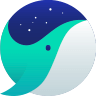
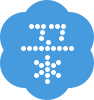

In [8]:
# 소스코드 출력하기
source
# 텍스트라서 어떤게 태그이고 속성이고 속성값인지 알 수 없다. 그래서 파싱이 필요!

<!DOCTYPE html>
<html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"/> <meta content="index,nofollow" name="robots"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"/> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"/> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:
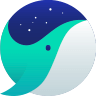
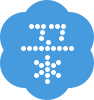

In [8]:
# html 파싱하기
soup

### html 태그
html 태그 구조는 다음과 같습니다.
- <태그 명(a, span, title, li...) 속성(class, content, href...)="속성 설명"> 텍스트 </태그>

In [10]:
# 네이버 찾고자하는 부분에서 오른쪽 마우스 검사창 -> html 코드에서 찾아줌

# 태그로 정보 찾기
# 첫번째 정보만 가져오기
soup.find('meta')

<meta charset="utf-8"/>

In [11]:
# 태그로 모든 정보 찾기
soup.find_all('meta')

[<meta charset="utf-8"/>,
 <meta content="IE=edge" http-equiv="X-UA-Compatible"/>,
 <meta content="width=1190" name="viewport"/>,
 <meta content="NAVER" name="apple-mobile-web-app-title"/>,
 <meta content="index,nofollow" name="robots"/>,
 <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"/>,
 <meta content="네이버" property="og:title"/>,
 <meta content="https://www.naver.com/" property="og:url"/>,
 <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/>,
 <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"/>,
 <meta content="summary" name="twitter:card"/>,
 <meta content="" name="twitter:title"/>,
 <meta content="https://www.naver.com/" name="twitter:url"/>,
 <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/>,
 <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:description"/>]

In [12]:
# 태그와 속성 찾기
soup.find_all('a', attrs = {'class' : 'nav'}) # 리스트 형태로 반환

[<a class="nav" data-clk="svc.mail" href="https://mail.naver.com/"><i class="ico_mail"></i>메일</a>,
 <a class="nav" data-clk="svc.cafe" href="https://section.cafe.naver.com/">카페</a>,
 <a class="nav" data-clk="svc.blog" href="https://section.blog.naver.com/">블로그</a>,
 <a class="nav" data-clk="svc.kin" href="https://kin.naver.com/">지식iN</a>,
 <a class="nav" data-clk="svc.shopping" href="https://shopping.naver.com/">쇼핑</a>,
 <a class="nav" data-clk="svc.pay" href="https://order.pay.naver.com/home">Pay</a>,
 <a class="nav" data-clk="svc.tvcast" href="https://tv.naver.com/"><i class="ico_tv"></i>TV</a>,
 <a class="nav" data-clk="svc.dic" href="https://dict.naver.com/">사전</a>,
 <a class="nav" data-clk="svc.news" href="https://news.naver.com/">뉴스</a>,
 <a class="nav" data-clk="svc.stock" href="https://finance.naver.com/">증권</a>,
 <a class="nav" data-clk="svc.land" href="https://land.naver.com/">부동산</a>,
 <a class="nav" data-clk="svc.map" href="https://map.naver.com/">지도</a>,
 <a class="nav" da

In [12]:
# 태그로 텍스트 확인
soup.find_all('a', attrs = {'class' : 'nav'})[0].text

'메일'

## 네이버랩 실시간 검색어 가지고 오기

In [13]:
# 정보를 가지고 올 url 열기 (네이버랩)
# 네이버 실시간 검색어에 필터가 생기면서 네이버 홈페이지에선 크롤링을 할 수가 없게 되었습니다.

url = 'https://datalab.naver.com/keyword/realtimeList.naver'

headers = {
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_5) AppleWebKit 537.36 (KHTML, like Gecko) Chrome",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8"
}

In [14]:
# html 불러오기

# 1. requests를 통해 정해준 url에 정보를 요청, 그 정보를 response 변수에 저장 
response = requests.get(url, headers=headers)

# 2. url의 정보가 들어있는 response의 텍스트 정보를 source 변수에 저장
source = response.text

# 3. BeautifulSoup을 통해 'lxml'파서를 사용하여 soup에 html 정보를 저장 (파이썬에서 사용할 수 있는 의미있는 객체구조로 변환)
soup = BeautifulSoup(source, 'lxml')

In [15]:
# html 코드 예쁘게 출력하기
soup.prettify

<bound method Tag.prettify of <!DOCTYPE html>
<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=1200" name="viewport"/>
<title>급상승검색어 : 네이버 데이터랩</title>
<link href="https://ssl.pstatic.net/static.datalab/202101180750/css/datalab.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/static.datalab/202101180750/css/graph.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/static.datalab/202101180750/img/favicon/android_legacy_xxxhpdi_192x192.png" rel="icon" sizes="192x192"/>
<link href="https://ssl.pstatic.net/static.datalab/202101180750/img/favicon/android_legacy_xxhpdi_144x144.png" rel="icon" sizes="144x144"/>
<link href="https://ssl.pstatic.net/static.datalab/202101180750/img/favicon/android_legacy_xhdpi_96x96.png" rel="icon" sizes="96x96"/>
<link href="https://ssl.pstatic.net/static.datalab/202101180750/img/favicon/android_legacy_hdpi_72X72.png" rel="icon" sizes="72

In [17]:
# 검색어 찾기 (전체연령 기준으로 나옵니다.)

soup.find_all('span', attrs = {'class' : 'item_title'})

[<span class="item_title">쏘카</span>,
 <span class="item_title">이재영 이다영</span>,
 <span class="item_title">2021 청룡영화제</span>,
 <span class="item_title">바이넥스</span>,
 <span class="item_title">설 명절 인사말</span>,
 <span class="item_title">실시간 교통정보</span>,
 <span class="item_title">바넘효과</span>,
 <span class="item_title">유아인</span>,
 <span class="item_title">영생교</span>,
 <span class="item_title">고등래퍼4</span>,
 <span class="item_title">눔프현상</span>,
 <span class="item_title">마빈 박</span>,
 <span class="item_title">새해 복 많이 받으세요</span>,
 <span class="item_title">권미진</span>,
 <span class="item_title">광양 산불</span>,
 <span class="item_title">대원미디어</span>,
 <span class="item_title">동방</span>,
 <span class="item_title">상보</span>,
 <span class="item_title">라미란</span>,
 <span class="item_title">김예령</span>]

In [18]:
# 순위 찾기 (전체연령 기준으로 나옵니다.)

soup.find_all('span', attrs = {'class' : 'item_num'})

[<span class="item_num">1</span>,
 <span class="item_num">2</span>,
 <span class="item_num">3</span>,
 <span class="item_num">4</span>,
 <span class="item_num">5</span>,
 <span class="item_num">6</span>,
 <span class="item_num">7</span>,
 <span class="item_num">8</span>,
 <span class="item_num">9</span>,
 <span class="item_num">10</span>,
 <span class="item_num">11</span>,
 <span class="item_num">12</span>,
 <span class="item_num">13</span>,
 <span class="item_num">14</span>,
 <span class="item_num">15</span>,
 <span class="item_num">16</span>,
 <span class="item_num">17</span>,
 <span class="item_num">18</span>,
 <span class="item_num">19</span>,
 <span class="item_num">20</span>]

In [19]:
# 검색어 리스트 만들기
search_word_list = []

for i in range(0,20):
    rank = soup.find_all('span', attrs = {'class' : 'item_num'})[i].text
    search_word = soup.find_all('span', attrs = {'class' : 'item_title'})[i].text
    
    data = rank, search_word
    search_word_list.append(data)

In [20]:
# 리스트 확인
search_word_list

[('1', '쏘카'),
 ('2', '이재영 이다영'),
 ('3', '2021 청룡영화제'),
 ('4', '바이넥스'),
 ('5', '설 명절 인사말'),
 ('6', '실시간 교통정보'),
 ('7', '바넘효과'),
 ('8', '유아인'),
 ('9', '영생교'),
 ('10', '고등래퍼4'),
 ('11', '눔프현상'),
 ('12', '마빈 박'),
 ('13', '새해 복 많이 받으세요'),
 ('14', '권미진'),
 ('15', '광양 산불'),
 ('16', '대원미디어'),
 ('17', '동방'),
 ('18', '상보'),
 ('19', '라미란'),
 ('20', '김예령')]

In [21]:
# 10위까지의 검색어만 저장하기
search_word_list[:10]

[('1', '쏘카'),
 ('2', '이재영 이다영'),
 ('3', '2021 청룡영화제'),
 ('4', '바이넥스'),
 ('5', '설 명절 인사말'),
 ('6', '실시간 교통정보'),
 ('7', '바넘효과'),
 ('8', '유아인'),
 ('9', '영생교'),
 ('10', '고등래퍼4')]

In [22]:
# 검색어 저장
search_word_list = search_word_list[:10]

In [23]:
import pandas as pd

In [24]:
# 데이터프레임으로 저장
df = pd.DataFrame(search_word_list, columns =['순위','검색어'])
df

,순위,검색어
0,1,쏘카
1,2,이재영 이다영
2,3,2021 청룡영화제
3,4,바이넥스
4,5,설 명절 인사말
5,6,실시간 교통정보
6,7,바넘효과
7,8,유아인
8,9,영생교
9,10,고등래퍼4


In [28]:
# csv 파일로 내보내기
df.to_csv('네이버랩 실시간 검색어 순위.csv', encoding ='utf-8')

네이버 뉴스 제목 수집
=====
URL 구조 이해하기
-----
정보를 가지고 오는 것은 사실 쉽습니다.<br>
알아서 원하는 정보를 긁어오는 크롤러를 만들기 위해서는 URL의 규칙을 이해하는 것이 중요합니다.

In [27]:
# ! pip install requests

import requests 
from bs4 import BeautifulSoup
import time # 막힘 방지를 위한 2번째 방법! (크롤링에 시간차를 두어 사람처럼 보이게 위장)
# 네이버 틀기도전에 코딩 실행하면 오류뜨니까 시간차이 두기.
import random
import re

In [28]:
# 해당 파트에서는 URL구조를 보는 것이 목적입니다. 아래 코드는 그냥 참고만 해주세요. 
# 기본적인 url 구조 (검색기간/검색어 변경하면서 url 확인해보기.)

def get_articles(html):
    results = []
    soup = BeautifulSoup(html, 'lxml')
    lis = soup.find_all('div', attrs={'class':re.compile(r'news_wrap')})
    for li in lis:
        title = 'NA' # 혹시 오류가 나거나 정보가 없는 경우
        naver_url = 'NA'
        pub = 'NA'
        date = 'NA'
        if li.find('a', attrs={'class':re.compile(r'news_tit')}).text:
            title = li.find('a', attrs={'class':re.compile(r'news_tit')}).get('title').strip()
            naver_url = li.find('a', attrs={'class':re.compile(r'news_tit')}).get('href').strip()
            pub = li.find('a', attrs={'class':'info'}).text.strip()
        results.append([title, naver_url, pub])
        print(title, naver_url, pub)
    return results

In [29]:
q = '코로나' 
startDate = '2021.02.01'
endDate = '2021.02.07'
# 한번에 가져올 수 있는 기사의 수는 4,000개가 최대입니다.

total_results = []
for page in range(5) : #range는 최대 400까지 설정하시면 됩니다.
    sleep_time = random.random()*5
    time.sleep(sleep_time)
    start = page*10 + 1
    url = 'https://search.naver.com/search.naver?&where=news&query='+q+'&sm=tab_pge&sort=2&photo=0&field=1&reporter_article=&pd=3&ds='+startDate+'&de='+endDate+'&mynews=0&refresh_start=0&start='+str(start)
    r = requests.get(url) #여기에서는 requests 모듈을 활용했습니다.
    html = r.text
    if re.search(r'검색결과가 없습니다',html):
        break
    results = get_articles(html)
    print(page, results, len(results))
    total_results.extend(results)

2월 임시국회 여야 대격돌…판사탄핵·코로나3법·가덕도신공항 최대 이슈 http://www.edaily.co.kr/news/newspath.asp?newsid=01279206628946256 이데일리
WHO팀, ‘코로나19 최초 집단감염’ 우한 수산시장 조사 시작 http://news.kbs.co.kr/news/view.do?ncd=5107620&ref=A KBS
일본 코로나19 신규 확진, 다시 2천 명대로 감소 http://news.kbs.co.kr/news/view.do?ncd=5107619&ref=A KBS
오늘부터 코로나19 백신 안전유통 위한 합동 모의훈련 https://www.ytn.co.kr/_ln/0103_202102010001024140 YTN
[ESG 경영] 최태원·이재용·정의선·구광모, '포스트 코로나' 지속가능ESG 생존전략..."선택 아닌 필수" http://www.greened.kr/news/articleView.html?idxno=286383 녹색경제신문
외출도 못해, 손주도 못봐···노년층 '코로나 블루' 짙어졌다 https://news.joins.com/article/olink/23577359 중앙일보언론사 선정
베이징 코 대신 항문 코로나검사, 외국인도 대상 “모욕적” https://news.joins.com/article/olink/23577375 중앙일보
코로나19 늪에 빠진 대구 야시장…'배달'이 해결책 될까 https://www.nocutnews.co.kr/news/5491166 노컷뉴스
코로나19 덕에…설선물 역대급 특수 ‘한우·굴비’ 몰렸다 https://news.joins.com/article/olink/23577421 중앙일보
코로나 퇴치 10대 프로젝트 전문가 토론회 http://www.kado.net/news/articleView.html?idxno=1058715 강원도민일보
0 [['2월 임시국회 여야 대격돌…판사탄핵·코로나3법·가덕도신공항 최대 이슈', 'http://www.edaily.co.kr/news/

In [30]:
import pandas as pd

In [31]:
pd.DataFrame(total_results, columns = ['기사 제목', 'URL', '신문사'])

,기사 제목,URL,신문사
0,2월 임시국회 여야 대격돌…판사탄핵·코로나3법·가덕도신공항 최대 이슈,http://www.edaily.co.kr/news/newspath.asp?news...,이데일리
1,"WHO팀, ‘코로나19 최초 집단감염’ 우한 수산시장 조사 시작",http://news.kbs.co.kr/news/view.do?ncd=5107620...,KBS
2,"일본 코로나19 신규 확진, 다시 2천 명대로 감소",http://news.kbs.co.kr/news/view.do?ncd=5107619...,KBS
3,오늘부터 코로나19 백신 안전유통 위한 합동 모의훈련,https://www.ytn.co.kr/_ln/0103_202102010001024140,YTN
4,"[ESG 경영] 최태원·이재용·정의선·구광모, '포스트 코로나' 지속가능ESG 생존...",http://www.greened.kr/news/articleView.html?id...,녹색경제신문
5,"외출도 못해, 손주도 못봐···노년층 '코로나 블루' 짙어졌다",https://news.joins.com/article/olink/23577359,중앙일보언론사 선정
6,"베이징 코 대신 항문 코로나검사, 외국인도 대상 “모욕적”",https://news.joins.com/article/olink/23577375,중앙일보
7,코로나19 늪에 빠진 대구 야시장…'배달'이 해결책 될까,https://www.nocutnews.co.kr/news/5491166,노컷뉴스
8,코로나19 덕에…설선물 역대급 특수 ‘한우·굴비’ 몰렸다,https://news.joins.com/article/olink/23577421,중앙일보
9,코로나 퇴치 10대 프로젝트 전문가 토론회,http://www.kado.net/news/articleView.html?idxn...,강원도민일보
